# Evaluating the trained models

## Loading the data

In [1]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Is this notebook running on Colab or Kaggle?
IS_COLAB = "google.colab" in sys.modules
IS_KAGGLE = "kaggle_secrets" in sys.modules

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "classification"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

In [31]:
from sklearn.datasets import fetch_openml
import numpy as np
import pandas as pd

In [3]:
mnist = fetch_openml('mnist_784', version=1, parser="auto") #This returns a bunch object (something like dictionary) that is compatible with sklearn

In [4]:
# Extract the full training set and test set
X_train_full = mnist.data[:60000]
y_train_full = mnist.target[:60000]

X_test = mnist.data[60000:]
y_test = mnist.target[60000:]

In [5]:
from sklearn.preprocessing import StandardScaler

In [6]:
scaler = StandardScaler()

In [7]:
X_train_full_scaled = scaler.fit_transform(X_train_full)
X_test_scaled = scaler.fit_transform(X_test)

In [8]:
y_train_full.iloc[0]

'5'

In [9]:
y_train_full = y_train_full.astype(np.uint8)

In [10]:
y_train_full.iloc[0]

5

In [29]:
y_train_full.describe()

count    60000.000000
mean         4.453933
std          2.889270
min          0.000000
25%          2.000000
50%          4.000000
75%          7.000000
max          9.000000
Name: class, dtype: float64

In [34]:
y_train_full.value_counts()

class
1    6742
7    6265
3    6131
2    5958
9    5949
0    5923
6    5918
8    5851
4    5842
5    5421
Name: count, dtype: int64

In [37]:
y_train_prop = y_train_full.value_counts() / len(y_train_full)

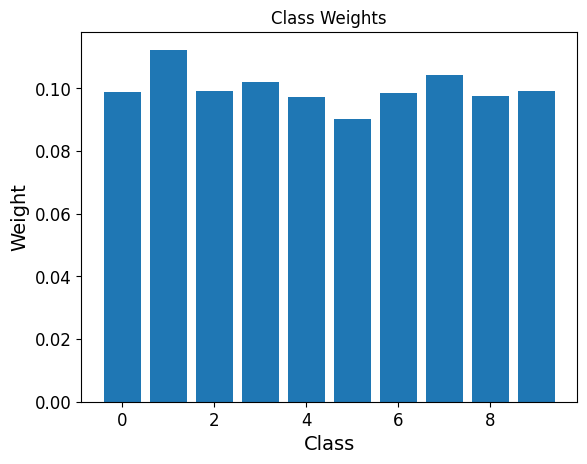

In [40]:
import matplotlib.pyplot as plt

# Plotting a bar plot
plt.bar(y_train_prop.index, y_train_prop)
plt.xlabel('Class')
plt.ylabel('Weight')
plt.title('Class Weights')
plt.show()

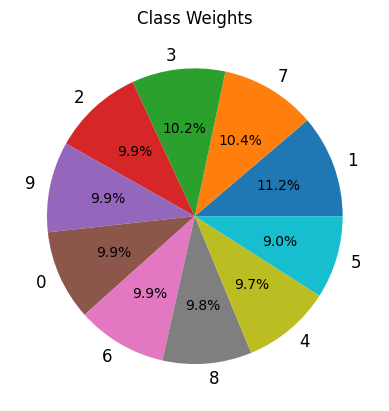

In [41]:
# Plotting a pie chart
plt.pie(y_train_prop, labels=y_train_prop.index, autopct='%1.1f%%')
plt.title('Class Weights')
plt.show()

In [11]:
print("Shape of full training set: ", X_train_full.shape)
print("Shape of full training set (Scaled): ", X_train_full_scaled.shape)
print("Shape of full training-target set: ", y_train_full.shape)
print()
print("Shape of test set: ", X_test.shape)
print("Shape of test set (Scaled): ", X_test_scaled.shape)
print("Shape of test-target set: ", y_test.shape)

Shape of full training set:  (60000, 784)
Shape of full training set (Scaled):  (60000, 784)
Shape of full training-target set:  (60000,)

Shape of test set:  (10000, 784)
Shape of test set (Scaled):  (10000, 784)
Shape of test-target set:  (10000,)


In [20]:
type(y_test.iloc[0])

str

In [21]:
y_test = y_test.astype(np.uint8)

In [22]:
type(y_test.iloc[0])

numpy.uint8

# Import models

## 1. Random Forest Classifier

### RF - OvO

In [12]:
import joblib

In [14]:
rf_ovo_clf = joblib.load('ovo_rf_clf_colab.pkl')

In [24]:
rf_ovo_clf_pred = rf_ovo_clf.predict(X_test)

#### Accuracy

In [16]:
from sklearn.metrics import accuracy_score

In [25]:
rf_ovo_clf_acc = accuracy_score(y_test, rf_ovo_clf_pred)

In [26]:
rf_ovo_clf_acc

0.9656

#### Precision

In [27]:
from sklearn.metrics import precision_score

In [43]:
rf_ovo_clf_prec = precision_score(y_test, rf_ovo_clf_pred, average='macro')

In [44]:
rf_ovo_clf_prec

0.9654536968771158

#### Recall

In [45]:
from sklearn.metrics import recall_score

In [46]:
rf_ovo_clf_recall = recall_score(y_test, rf_ovo_clf_pred, average='macro')

In [47]:
rf_ovo_clf_recall

0.9653198576134285

#### F1 Score

In [48]:
from sklearn.metrics import f1_score

In [52]:
rf_ovo_clf_f1 = f1_score(y_test, rf_ovo_clf_pred, average='weighted')

In [53]:
rf_ovo_clf_f1

0.9656443811404773

In [55]:
#  f1_score(y_test, rf_ovo_clf_pred, average='weighted')

#### Decision Scores

In [61]:
from sklearn.metrics import classification_report

In [56]:
y_test.iloc[0]

7

In [66]:
# Select a single image from the test set
image = X_test.iloc[0]

# Reshape the image to match the input shape of the classifier
reshaped_image = image.values.reshape(1, -1)

# Get the decision scores for each class
decision_scores = rf_ovo_clf.decision_function(reshaped_image)

# Print the decision scores for each class
for class_index, class_score in enumerate(decision_scores[0]):
    print(f"Class {class_index}: {class_score}")


/home/test/.local/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but OneVsOneClassifier was fitted with feature names
  warnings.warn(


Class 0: 3.719077568134172
Class 1: 0.7115902964959568
Class 2: 6.7915106117353305
Class 3: 6.939890710382514
Class 4: 5.006535947712418
Class 5: 2.8903803131991053
Class 6: -0.21956769055745165
Class 7: 9.291614518147684
Class 8: 2.229813664596273
Class 9: 7.290924512298558


/home/test/.local/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but OneVsOneClassifier was fitted with feature names
  warnings.warn(


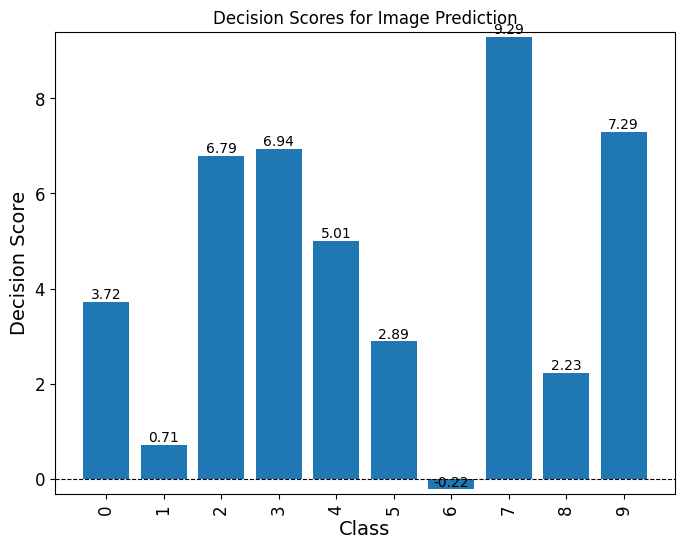

In [69]:
import matplotlib.pyplot as plt
import numpy as np

# Select a single image from the test set
image = X_test.iloc[0]

# Reshape the image to match the input shape of the classifier
reshaped_image = image.values.reshape(1, -1)

# Get the decision scores for each class
decision_scores = rf_ovo_clf.decision_function(reshaped_image)

# Get the class labels
class_labels = rf_ovo_clf.classes_

# Create a bar plot of the decision scores
plt.figure(figsize=(8, 6))
bars = plt.bar(np.arange(len(class_labels)), decision_scores[0])

# Add labels to the bars
for i, bar in enumerate(bars):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f'{decision_scores[0][i]:.2f}', 
             ha='center', va='bottom')

# Add class labels to the x-axis
plt.xticks(np.arange(len(class_labels)), class_labels)

# Add labels and title
plt.xlabel('Class')
plt.ylabel('Decision Score')
plt.title('Decision Scores for Image Prediction')

# Add a horizontal line at zero
plt.axhline(0, color='black', linestyle='--', linewidth=0.8)

# Set the y-axis limits
plt.ylim(min(decision_scores[0]) - 0.1, max(decision_scores[0]) + 0.1)

# Rotate the x-axis labels if needed
plt.xticks(rotation='vertical')

# Display the plot
plt.show()


In [70]:
# Nice!

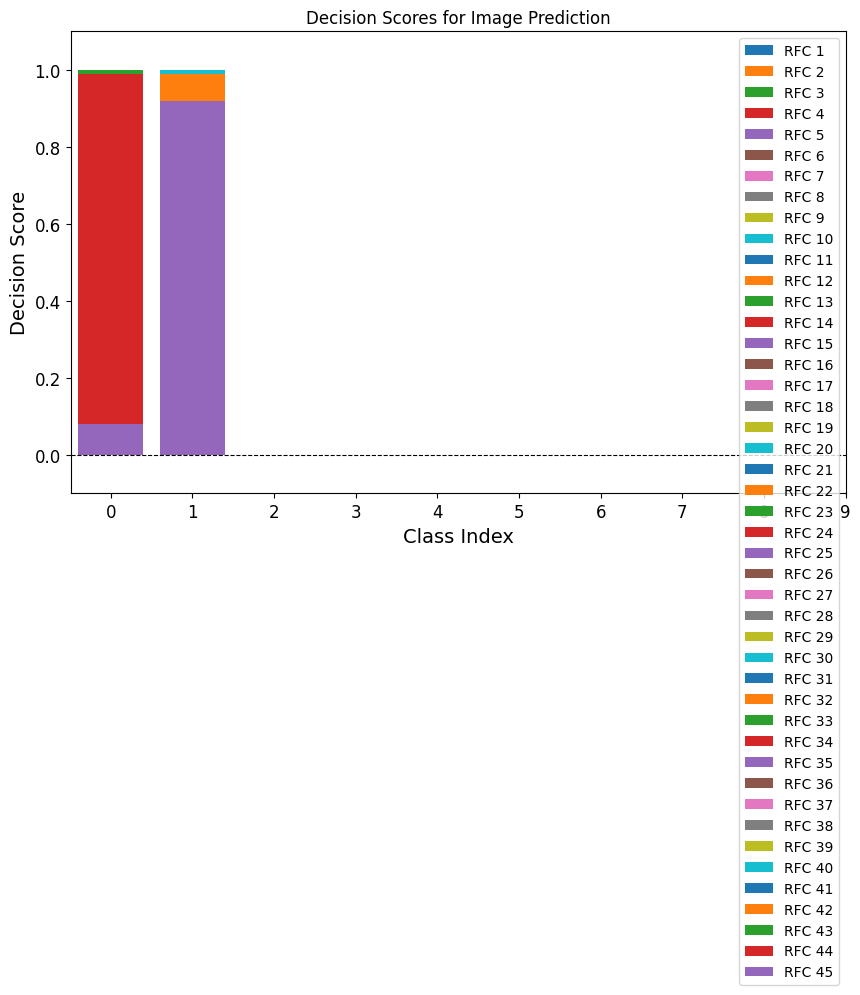

In [77]:
import matplotlib.pyplot as plt

# Select a single image from the test set
image = X_test.iloc[0]

# Reshape the image to match the input shape of the classifiers
reshaped_image = image.values.reshape(1, -1)

# Get the class labels
class_labels = rf_ovo_clf.classes_

# Create a bar plot for each Random Forest Classifier
plt.figure(figsize=(10, 6))
for i, rfc in enumerate(rf_ovo_clf.estimators_):
    # Get the decision scores for the image from the current classifier
    decision_scores = rfc.predict_proba(reshaped_image)[0]

    # Plot the decision scores as a bar plot
    plt.bar(range(len(decision_scores)), decision_scores, label=f'RFC {i + 1}')

# Add labels and title
plt.xlabel('Class Index')
plt.ylabel('Decision Score')
plt.title('Decision Scores for Image Prediction')

# Add x-axis ticks with class labels
plt.xticks(range(len(class_labels)), class_labels)

# Add a horizontal line at zero
plt.axhline(0, color='black', linestyle='--', linewidth=0.8)

# Set the y-axis limits
plt.ylim(-0.1, 1.1)

# Create a legend for the Random Forest Classifiers
plt.legend(loc='upper right')

# Display the plot
plt.show()


In [87]:
# Choose a specific input image
input_index = 0

# Get the number of classes
num_classes = len(rfc.estimators_)

# Create a list to store the scores for each pair of digits
pair_scores = []

# Iterate over all pairs of digits
for i in range(num_classes):
    for j in range(i + 1, num_classes):
        # Predict the class probabilities for the current pair of digits
        estimator_index = i * (num_classes - 1) - (i * (i + 1)) // 2 + j - i - 1
        decision_scores = rfc.estimators_[estimator_index].predict_proba(X_test.iloc[input_index].values.reshape(1, -1))

        # Store the decision scores for the current pair of digits
        pair_scores.append(decision_scores)

        # Determine the winner and their respective score
        winner = np.argmax(decision_scores)
        winner_score = np.max(decision_scores)

        print(f"Winner between {i} and {j}:")
        print("Winner:", winner)
        print("Score:", winner_score)
        print()


Winner between 0 and 1:
Winner: 1
Score: 1.0

Winner between 0 and 2:
Winner: 0
Score: 1.0

Winner between 0 and 3:
Winner: 1
Score: 1.0

Winner between 0 and 4:
Winner: 1
Score: 1.0

Winner between 0 and 5:
Winner: 1
Score: 1.0

Winner between 0 and 6:
Winner: 1
Score: 1.0

Winner between 0 and 7:
Winner: 1
Score: 1.0

Winner between 0 and 8:
Winner: 1
Score: 1.0

Winner between 0 and 9:
Winner: 1
Score: 1.0

Winner between 0 and 10:
Winner: 1
Score: 1.0

Winner between 0 and 11:
Winner: 1
Score: 1.0

Winner between 0 and 12:
Winner: 1
Score: 1.0

Winner between 0 and 13:
Winner: 1
Score: 1.0

Winner between 0 and 14:
Winner: 1
Score: 1.0

Winner between 0 and 15:
Winner: 1
Score: 1.0

Winner between 0 and 16:
Winner: 1
Score: 1.0

Winner between 0 and 17:
Winner: 1
Score: 1.0

Winner between 0 and 18:
Winner: 1
Score: 1.0

Winner between 0 and 19:
Winner: 1
Score: 1.0

Winner between 0 and 20:
Winner: 1
Score: 1.0

Winner between 0 and 21:
Winner: 1
Score: 1.0

Winner between 0 and 2

IndexError: list index out of range